In [1]:
pip install pandas scikit-learn seaborn matplotlib


Note: you may need to restart the kernel to use updated packages.


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'customerID_0003-MKNFE',
       'customerID_0004-TLHLJ', 'customerID_0011-IGKFF',
       'customerID_0013-EXCHZ', 'customerID_0013-MHZWF',
       'customerID_0013-SMEOE', 'customerID_0014-BMAQU',
       ...
       'TotalCharges_996.45', 'TotalCharges_996.85', 'TotalCharges_996.95',
       'TotalCharges_997.65', 'TotalCharges_997.75', 'TotalCharges_998.1',
       'TotalCharges_999.45', 'TotalCharges_999.8', 'TotalCharges_999.9',
       'Churn_Yes'],
      dtype='object', length=13602)


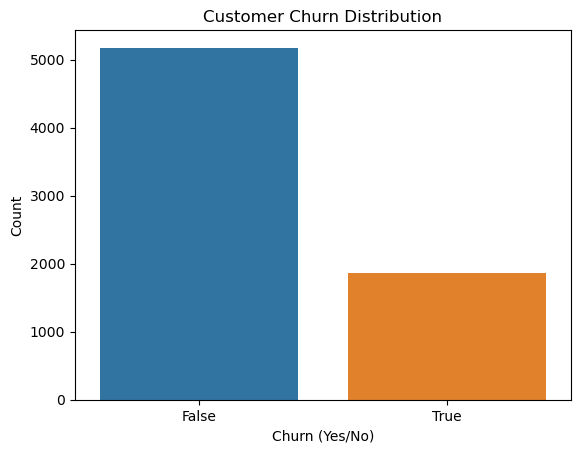

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset and path
data = pd.read_csv('Downloads/Telco_Customer_Churn.csv')

# Remove rows with missing values
data = data.dropna()  

# Convert variables into numerical format 
data = pd.get_dummies(data, drop_first=True)

# Display the names of the columns 
print(data.columns)

# Visualize the distribution of customers who churned
sns.countplot(x='Churn_Yes', data=data) 
plt.title('Customer Churn Distribution')  # title
plt.xlabel('Churn (Yes/No)')  #  x-axis
plt.ylabel('Count')  #  y-axis
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split the data into features as (X), target as (y)
X = data.drop('Churn_Yes', axis=1)  
y = data['Churn_Yes']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Train the model using training data
rf_model.fit(X_train, y_train)

# Make predictions on test set
y_pred = rf_model.predict(X_test)

# Evaluating model's performance 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.81      0.94      0.87      1539
        True       0.71      0.40      0.51       574

    accuracy                           0.79      2113
   macro avg       0.76      0.67      0.69      2113
weighted avg       0.78      0.79      0.77      2113



In [4]:
from sklearn.metrics import accuracy_score, f1_score

# Calculate accuracy 
accuracy = accuracy_score(y_test, y_pred)

# Calculate F1-score 
f1 = f1_score(y_test, y_pred)

# results
print(f"Accuracy: {accuracy:.2f}")  
print(f"F1-Score: {f1:.2f}")          

Accuracy: 0.79
F1-Score: 0.51


In [13]:
#Making predictions on new customer data.

import pandas as pd

# Example new customer data
new_customer_data = pd.DataFrame({
    'gender': ['Female'],
    'SeniorCitizen': [0],
    'Partner': ['Yes'],
    'Dependents': ['No'],
    'tenure': [5],
    'PhoneService': ['Yes'],
    'MultipleLines': ['No'],
    'InternetService': ['Fiber optic'],
    'OnlineSecurity': ['No'],
    'OnlineBackup': ['Yes'],
    'DeviceProtection': ['No'],
    'TechSupport': ['No'],
    'StreamingTV': ['Yes'],
    'StreamingMovies': ['No'],
    'Contract': ['Month-to-month'],
    'PaperlessBilling': ['Yes'],
    'PaymentMethod': ['Electronic check'],
    'MonthlyCharges': [85.5],
    'TotalCharges': [400]
})

# Preprocess the new customer data to match the training set
training_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
                    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                    'MonthlyCharges', 'TotalCharges']

# Ensure new customer data columns match the training data
new_customer_data = new_customer_data.reindex(columns=training_columns)

new_customer_data_encoded = pd.get_dummies(new_customer_data, drop_first=True)

# Fill missing columns
required_columns = X_train.columns  # Columns that the model expects
for col in required_columns:
    if col not in new_customer_data_encoded.columns:
        new_customer_data_encoded[col] = 0

# Ensure the column order matches the training data
new_customer_data_encoded = new_customer_data_encoded[required_columns]

# Predict churn using the trained model
churn_prediction = rf_model.predict(new_customer_data_encoded)

# Output prediction
if churn_prediction[0] == 1:
    print("The customer is likely to churn.")
else:
    print("The customer is not likely to churn.")

# probability of churn
churn_probabilities = rf_model.predict_proba(new_customer_data_encoded)
print(f"Probability of churn: {churn_probabilities[0][1]:.2f}")


The customer is not likely to churn.
Probability of churn: 0.50
